In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("loan_data_set.xlsx")
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y


In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

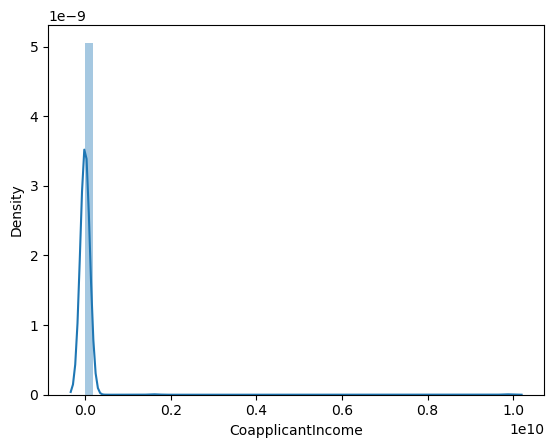

In [4]:
sns.distplot(df["CoapplicantIncome"])
plt.show()

In [5]:
#Q1 = df["CoapplicantIncome"].quantile(0.25)
#Q3 = df["CoapplicantIncome"].quantile(0.75)
#IQR = Q3-Q1

In [6]:
#min_r = Q1-(1.5*IQR)
#max_r = Q3+(1.5*IQR)
#min_r,max_r

In [20]:
#df2 = df[df["CoapplicantIncome"]<=max_r]

In [21]:
#sns.distplot(df2["CoapplicantIncome"])
#plt.show()

In [22]:
from sklearn.preprocessing import FunctionTransformer

In [23]:
ft = FunctionTransformer(func=np.log1p)
ft.fit(df[["CoapplicantIncome"]])


FunctionTransformer(func=<ufunc 'log1p'>)

In [24]:
df["CoapplicantIncome_tf"] = ft.transform(df[["CoapplicantIncome"]])

In [25]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_tf
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N,7.319202
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y,0.000000


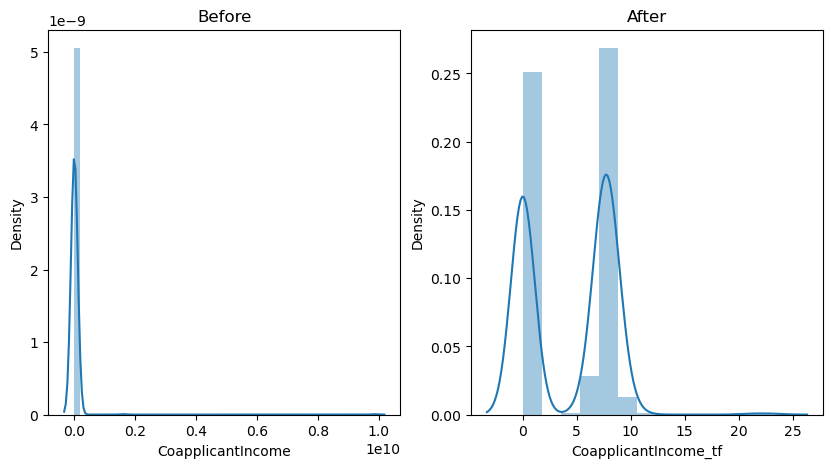

In [26]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(df["CoapplicantIncome"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(df["CoapplicantIncome_tf"])
plt.show()

In [28]:
from sklearn.preprocessing import FunctionTransformer
ft1 = FunctionTransformer(func=lambda x : x**2)
ft1.fit(df[["CoapplicantIncome"]])
df["CoapplicantIncome_tf1"] = ft1.transform(df[["CoapplicantIncome"]])


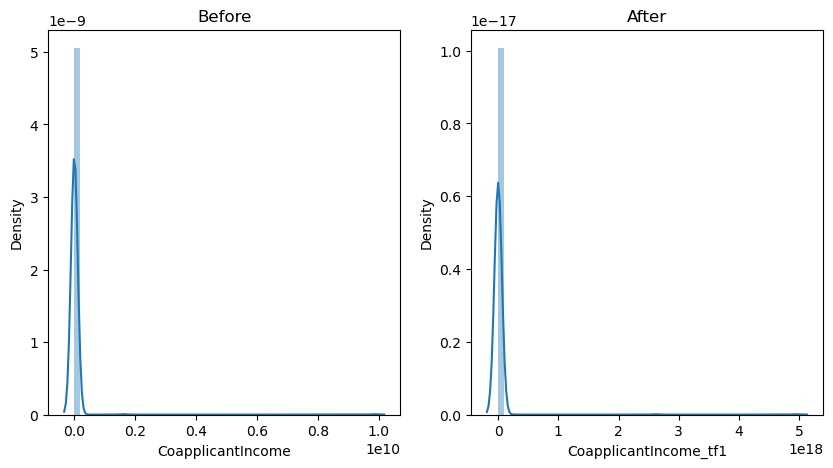

In [29]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(df["CoapplicantIncome"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(df["CoapplicantIncome_tf1"])
plt.show()